In [82]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/keralaroadaccidents/Keralapolice datasetcsv.csv
/kaggle/input/keralapolicemonthly/2001 to 2019 Kerala Police.csv


In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime


from pandas.tseries.offsets import DateOffset

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot



import seaborn as sns;sns.set()

import warnings
warnings.filterwarnings("ignore")
import itertools

#Arima Model
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#Facebook Prophet Model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [84]:
#Reading dataset
data=pd.read_csv('../input/keralaroadaccidents/Keralapolice datasetcsv.csv')
df=pd.read_csv('../input/keralapolicemonthly/2001 to 2019 Kerala Police.csv')

# Data Analysis of dataframe 'data'

In [85]:
print('-'*60)
print('          *** Head of the dataframe ***')
print('-'*60)
print(data.head())
print('-'*60)
print('          *** Tail of the dataframe ***')
print('-'*60)
print(data.tail())

------------------------------------------------------------
          *** Head of the dataframe ***
------------------------------------------------------------
  STATE/UT  YEAR  JANUARY  FEBRUARY  MARCH  APRIL   MAY  JUNE  JULY  AUGUST  \
0   Kerala  2001     3199      2935   2972   2912  2887  2829  2845    3012   
1   Kerala  2002     3072      2739   2643   3096  3113  2754  2731    2688   
2   Kerala  2003     2894      2485   2495   2570  2614  2526  2534    2569   
3   Kerala  2004     3661      3393   3477   3411  3239  3306  3164    3334   
4   Kerala  2005     3862      3422   3667   3565  3873  3407  3138    3501   

   SEPTEMBER  OCTOBER  NOVEMBER  DECEMBER  TOTAL  
0       3060     3048      3247      3493  36439  
1       2835     2897      2908      3058  34534  
2       2612     2852      2799      2997  31947  
3       3399     3532      3425      3762  41103  
4       3108     3505      3605      3710  42363  
---------------------------------------------------------

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
STATE/UT     19 non-null object
YEAR         19 non-null int64
JANUARY      19 non-null int64
FEBRUARY     19 non-null int64
MARCH        19 non-null int64
APRIL        19 non-null int64
MAY          19 non-null int64
JUNE         19 non-null int64
JULY         19 non-null int64
AUGUST       19 non-null int64
SEPTEMBER    19 non-null int64
OCTOBER      19 non-null int64
NOVEMBER     19 non-null int64
DECEMBER     19 non-null int64
TOTAL        19 non-null int64
dtypes: int64(14), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Number of accidents')

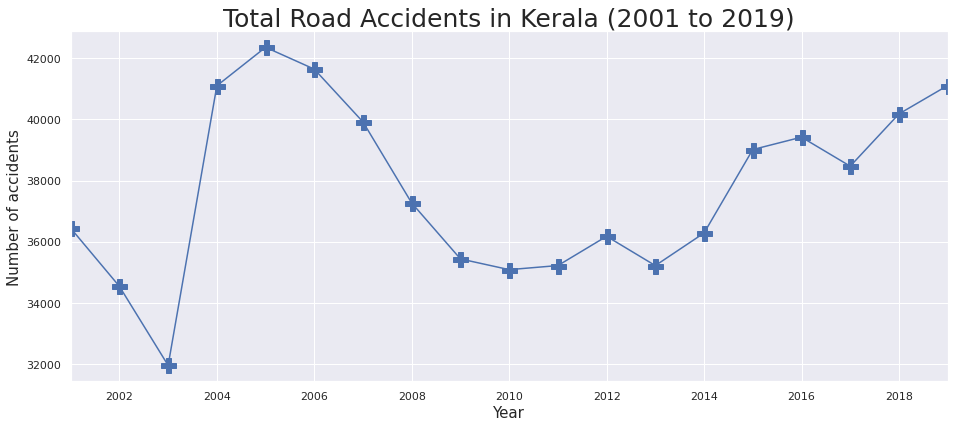

In [87]:
#Visualizing accidents in Kerala from year 2001 to 2019 
plt.figure(figsize=(14,6))
#plt.style.use('fivethirtyeight')
plt.plot(data.YEAR,data.TOTAL, marker='P', markersize=15)
plt.xlim(2001,2019) #to scale
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}") #toformat the x axis 
plt.gca().xaxis.set_major_formatter(formatter)
plt.title("Total Road Accidents in Kerala (2001 to 2019)", size="25",)
plt.xlabel("Year",size="15")
plt.ylabel("Number of accidents", size="15")

# Data Analysis of dataframe 'df'

In [88]:
print('-'*60)
print('*** Head of the dataframe ***')
print('-'*60)
print(df.head())
print('-'*60)
print('*** Tail of the dataframe ***')
print('-'*60)
print(df.tail())

------------------------------------------------------------
*** Head of the dataframe ***
------------------------------------------------------------
   Year     Month  No of accidents
0  2001   January             3199
1  2001  February             2935
2  2001     March             2972
3  2001     April             2912
4  2001       May             2887
------------------------------------------------------------
*** Tail of the dataframe ***
------------------------------------------------------------
     Year      Month  No of accidents
223  2019     August             2925
224  2019  September             3109
225  2019    October             3344
226  2019   November             3451
227  2019   December             3565


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
Year               228 non-null int64
Month              228 non-null object
No of accidents    228 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


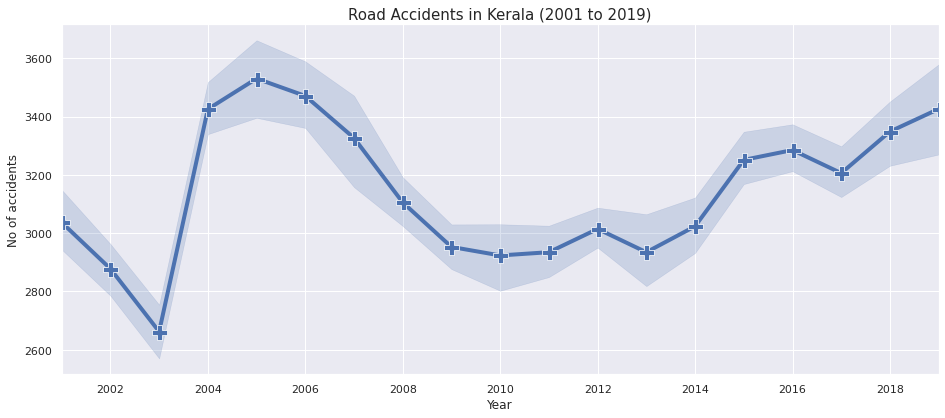

In [90]:
fig, ax = plt.subplots(figsize=(14,6))
plt.style.use('fivethirtyeight')

a = sns.lineplot(x='Year', y="No of accidents", data=df ,marker='P', markersize=15,scalex=1.0)
plt.xlim(2001,2019) #to scale
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}") #toformat the x axis 
plt.gca().xaxis.set_major_formatter(formatter)
a.set_title("Road Accidents in Kerala (2001 to 2019)",fontsize=15)
plt.show()

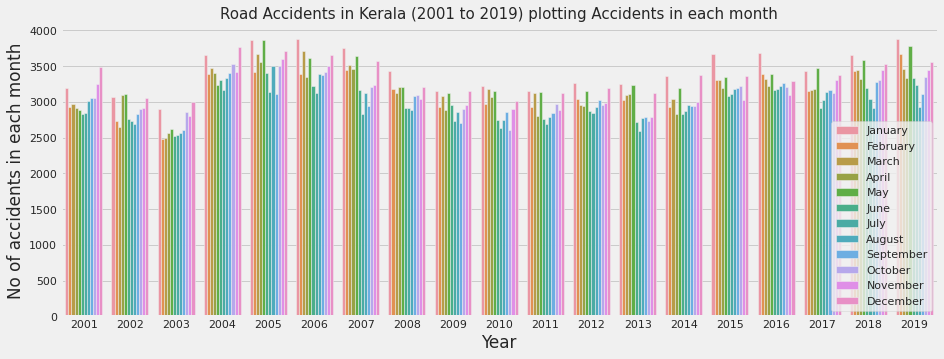

In [91]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="No of accidents",hue = 'Month',data=df)
a.set_title("Road Accidents in Kerala (2001 to 2019) plotting Accidents in each month",fontsize=15)
a.set_ylabel("No of accidents in each month")
plt.legend(loc='lower right')
plt.show()

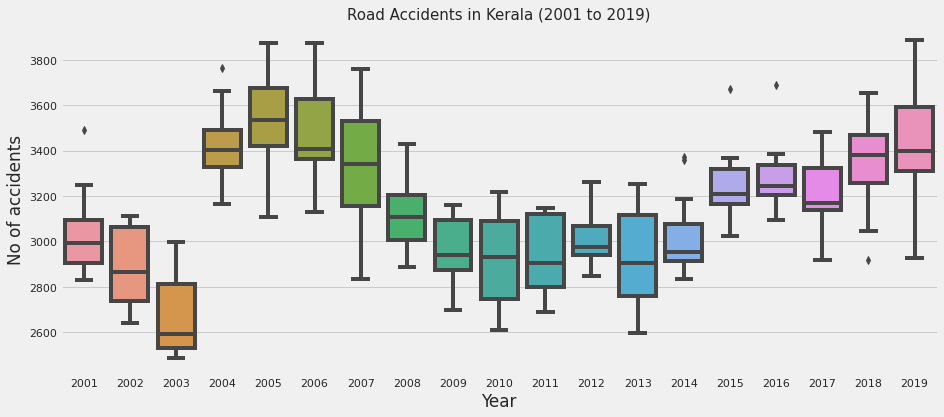

In [92]:
fig, a = plt.subplots(figsize=(14,6))
palette = sns.color_palette("mako_r", 4)
a = sns.boxplot(x="Year", y="No of accidents",data=df)
a.set_title("Road Accidents in Kerala (2001 to 2019)",fontsize=15)
a.set_ylabel("No of accidents")

plt.show()

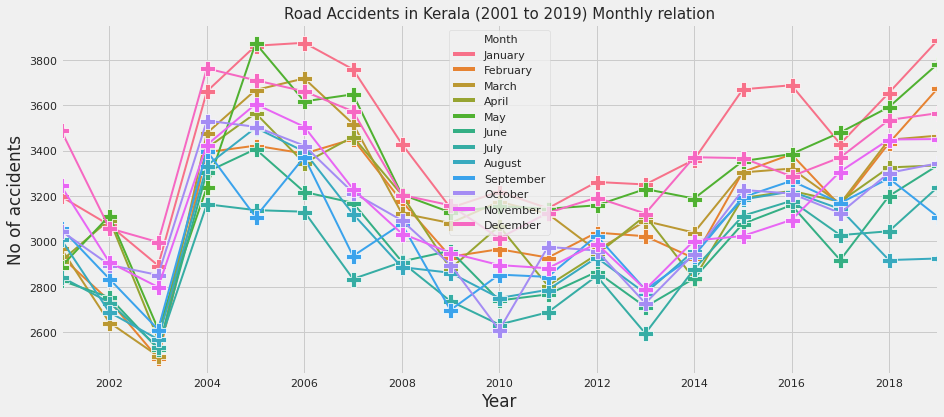

In [93]:
fig, ax = plt.subplots(figsize=(14,6))
plt.style.use('fivethirtyeight')
a = sns.lineplot(x="Year", y="No of accidents",hue='Month', data=df ,marker='P',linewidth='2',markersize=15)
plt.xlim(2001,2019) #to scale
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}") #toformat the x axis 
plt.gca().xaxis.set_major_formatter(formatter)
a.set_title("Road Accidents in Kerala (2001 to 2019) Monthly relation",fontsize=15)
plt.legend(loc='upper center')
plt.show()

# Parse_dates and creating new dataframe 'monthly' 

In [94]:
# We combine Year and Month as 'Year_Month' and now it has dates
pmonthly = pd.read_csv('../input/keralapolicemonthly/2001 to 2019 Kerala Police.csv', parse_dates=[[0,1]]) 

In [95]:
pmonthly.head()

,Year_Month,No of accidents
0,2001-01-01,3199
1,2001-02-01,2935
2,2001-03-01,2972
3,2001-04-01,2912
4,2001-05-01,2887


In [96]:
pmonthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
Year_Month         228 non-null datetime64[ns]
No of accidents    228 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


In [97]:
pmonthly.dtypes

Year_Month         datetime64[ns]
No of accidents             int64
dtype: object

In [98]:
monthly= pmonthly.set_index('Year_Month')

In [99]:
monthly.head()

,No of accidents
Year_Month,
2001-01-01,3199
2001-02-01,2935
2001-03-01,2972
2001-04-01,2912
2001-05-01,2887


# Plotting Monthly variation

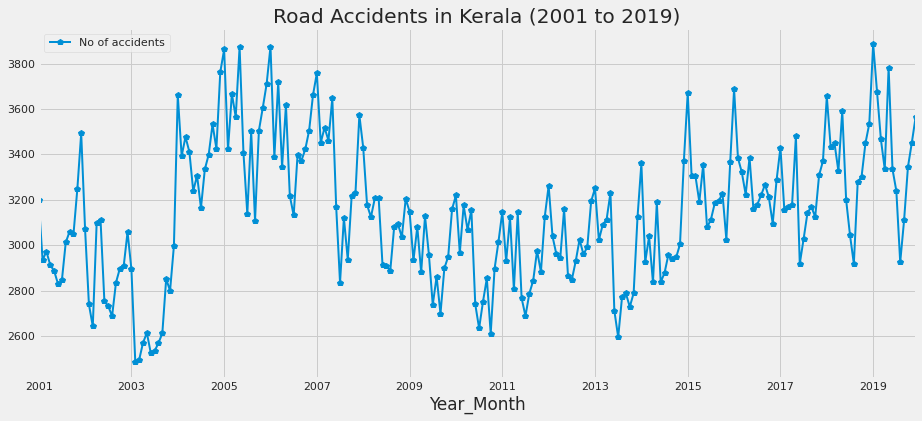

In [100]:
monthly.plot.line(figsize=(14,6), marker='p', linewidth='2',title="Road Accidents in Kerala (2001 to 2019)")

# Seasonal Decomposition

<Figure size 432x288 with 0 Axes>

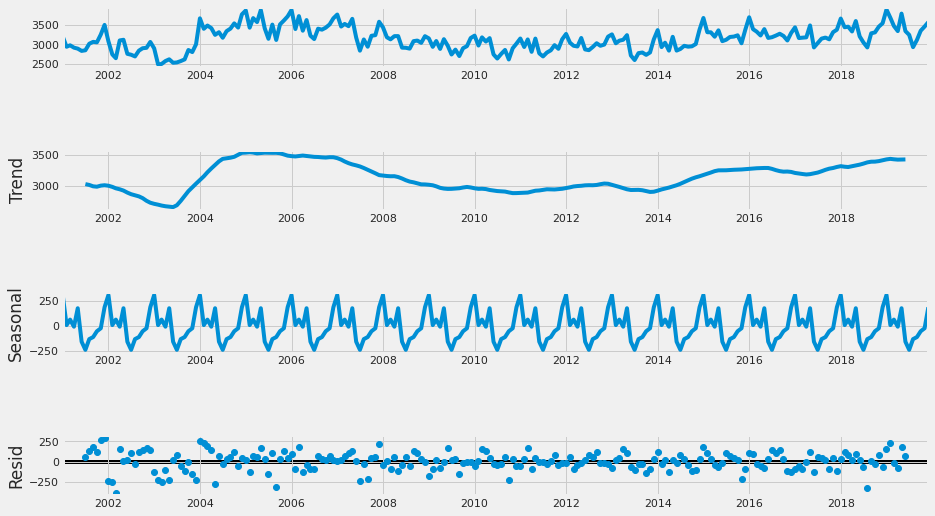

In [101]:
decomposition = seasonal_decompose(monthly, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

# 1.Seasonal Arima (SARIMA)Model forecast

In [102]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [103]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4304.404400753444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3809.679494692933
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3006.5828230686766
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2837.9608439464223
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3021.3611868761386
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3003.418082973578
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2852.893312848174
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2817.3375905088024
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4127.538038176408
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3564.251602440762
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2899.7691021522296
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2723.808764791186
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2928.059079837239
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2884.3086841932145
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2755.0817138985058
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2709.0930929205106
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3075.5476595609484
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2860.052778770657
A

According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

* ***The low AIC value the better.***

Our output suggests that SARIMAXARIMA (0, 1, 1)x(1, 1, 1, 12)12  with AIC value of **2573.200166278445** 
is the best combination, so we should consider this to be optimal option.

In [104]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(monthly['No of accidents'], trend='n',\
                     order=(0,1,1), \
                     seasonal_order=(1,1,1,12),\
                     enforce_stationarity=False,\
                     enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    No of accidents   No. Observations:                  228
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1282.600
Date:                            Mon, 04 May 2020   AIC                           2573.200
Time:                                    11:03:01   BIC                           2586.413
Sample:                                01-01-2001   HQIC                          2578.547
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4424      0.047     -9.404      0.000      -0.535      -0.350
ar.S.L12      -0.1015      0.074   

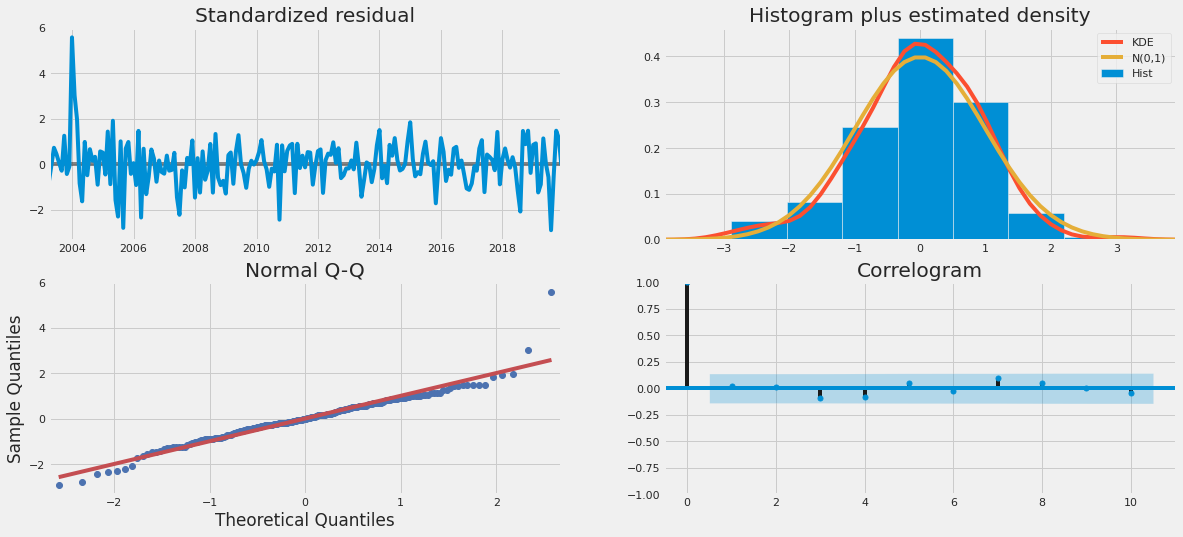

In [105]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

With the diagnostic above we can visualize important information as the distribution and the Auto correlation function ACF (correlogram). Values upward the “0” has some correlation over the time series data. Values near to “1” demonstrates strongest correlation.

# Validating model for last 12 months(2018 Jan to 2019 Dec)

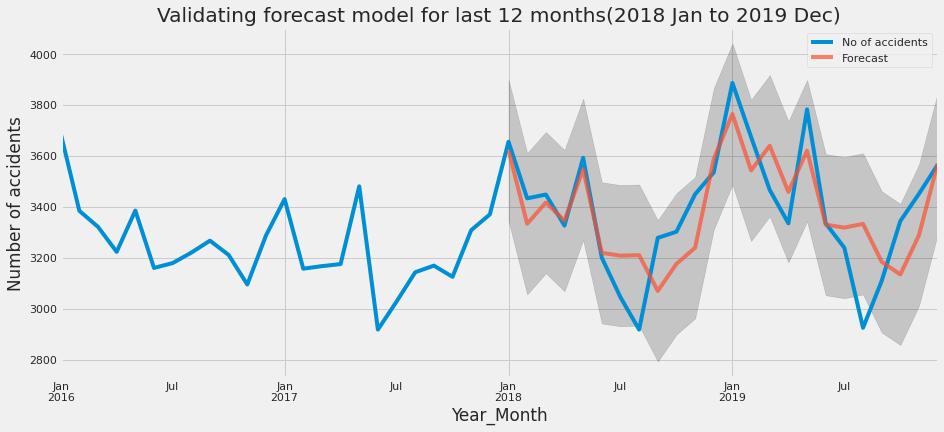

In [106]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly['2016':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Validating forecast model for last 12 months(2018 Jan to 2019 Dec)')
ax.set_xlabel('Year_Month')
ax.set_ylabel('Number of accidents')
plt.legend()
plt.show()

* The above step consists in comparing the true values with the forecast predictions. 
* Our forecasts fit with the true values almost. 
* The command “pred = results.get_prediction(start=pd.to_datetime(‘2018–01–01’)” determines the period which you would      start the forecast in comparing with the true data.

# Measuring Accuracy using Mean Squared Error and Root Mean Squared Error

In [107]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2018-01-01':]

mse = ((monthly_forecasted -  monthly_truth["No of accidents"]) ** 2).mean()

print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 24386.25
The Root Mean Squared Error is 156.16



* MSE and RMSE, values closer to zero are better. 
* That is the measure of accuracy.

In [108]:
print('-'*30)
print("Actual accidents")
print('-'*30)
print(monthly_truth.head(12))
print('-'*30)
print("Forcasted accidents")
print('-'*30)
print(monthly_forecasted.head(12))
print('-'*45)
print('Forcasted Range (min-max) number of accidents')
print('-'*45)
print(pred_ci.head(24))

------------------------------
Actual accidents
------------------------------
            No of accidents
Year_Month                 
2018-01-01             3655
2018-02-01             3433
2018-03-01             3448
2018-04-01             3326
2018-05-01             3592
2018-06-01             3200
2018-07-01             3045
2018-08-01             2918
2018-09-01             3278
2018-10-01             3302
2018-11-01             3449
2018-12-01             3535
------------------------------
Forcasted accidents
------------------------------
2018-01-01    3621.088199
2018-02-01    3333.255854
2018-03-01    3416.293873
2018-04-01    3345.502574
2018-05-01    3546.698444
2018-06-01    3219.066757
2018-07-01    3208.207104
2018-08-01    3210.158254
2018-09-01    3069.720556
2018-10-01    3175.853495
2018-11-01    3239.120191
2018-12-01    3587.271986
Freq: MS, dtype: float64
---------------------------------------------
Forcasted Range (min-max) number of accidents
------------------

# Future prediction

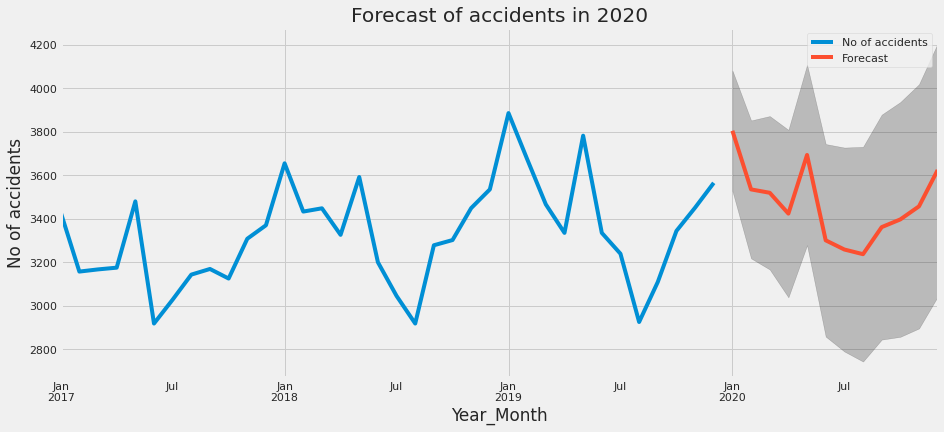

In [109]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = monthly['2017':].plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast of accidents in 2020')
ax.set_xlabel('Year_Month')
ax.set_ylabel('No of accidents')
plt.legend()
plt.show()

In [110]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2020-01-01    3804.661000
2020-02-01    3534.921443
2020-03-01    3519.431347
2020-04-01    3423.661089
2020-05-01    3693.416708
2020-06-01    3300.730473
2020-07-01    3258.462317
2020-08-01    3236.957846
2020-09-01    3361.451001
2020-10-01    3396.915507
2020-11-01    3457.096149
2020-12-01    3624.013140
Freq: MS, dtype: float64

* Here we forecast the accidents for the next 12 months. 
* This parameter can me modified in the line “pred_uc = results.get_forecast(steps=12)” of the code.
* Since covid-19 pandemic & lockdown the prediction may go wrong so the predication may be accurate till March 2020

# 2. Facebook Prophet Model forecast


In [111]:
pmonthly.head()

,Year_Month,No of accidents
0,2001-01-01,3199
1,2001-02-01,2935
2,2001-03-01,2972
3,2001-04-01,2912
4,2001-05-01,2887


In [112]:
train_dataset = pd.DataFrame()
train_dataset['ds'] = pmonthly['Year_Month']
train_dataset['y'] = pmonthly['No of accidents']

In [113]:
train_dataset.head()

,ds,y
0,2001-01-01,3199
1,2001-02-01,2935
2,2001-03-01,2972
3,2001-04-01,2912
4,2001-05-01,2887


In [114]:
#BY default interval_width/ confidence factor is 80%
prophet = Prophet(interval_width=0.95)
prophet.fit(train_dataset)

In [115]:
future = prophet.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
235,2020-07-31
236,2020-08-31
237,2020-09-30
238,2020-10-31
239,2020-11-30


In [116]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
235,2020-07-31,3283.876179,2949.698010,3620.850359
236,2020-08-31,3317.167435,2991.239644,3657.689433
237,2020-09-30,3463.047361,3103.078930,3807.958182
238,2020-10-31,3452.169972,3101.254786,3765.618226
239,2020-11-30,3633.758823,3265.872569,3980.033561


 **Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).**

<function matplotlib.pyplot.show(*args, **kw)>

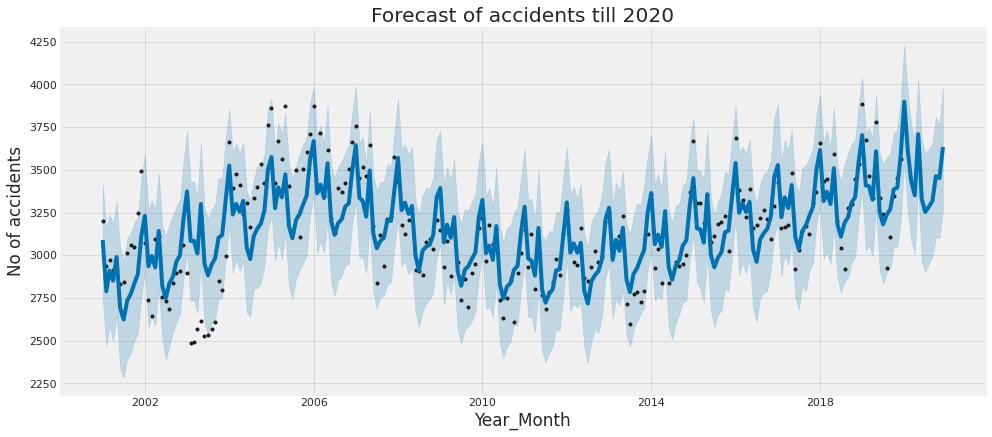

In [117]:
fig = prophet.plot(forecast,xlabel="Year_Month",ylabel="No of accidents",figsize=(14, 6))
ax = fig.gca()
ax.set_title("Forecast of accidents till 2020")

plt.show

It’s always nice to check how does the model perform on historical data. 
* Deep blue line is forecasting number of accidents
* Black dots are actual number of accidents
* The light blue shade is 95% confidence interval around the forecast.

From 2020 black dots are not visible as it shows only the future forecast

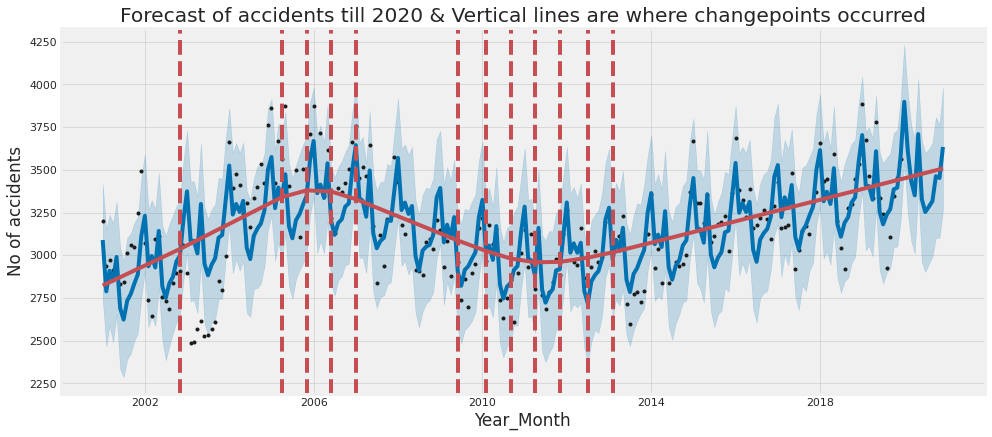

In [118]:
fig = prophet.plot(forecast,xlabel="Year_Month",ylabel="No of accidents",figsize=(14, 6))
ax = fig.gca()
ax.set_title("Forecast of accidents till 2020 & Vertical lines are where changepoints occurred")
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

**One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series plus manyally included holidayes contribute to the overall forecasted values:**

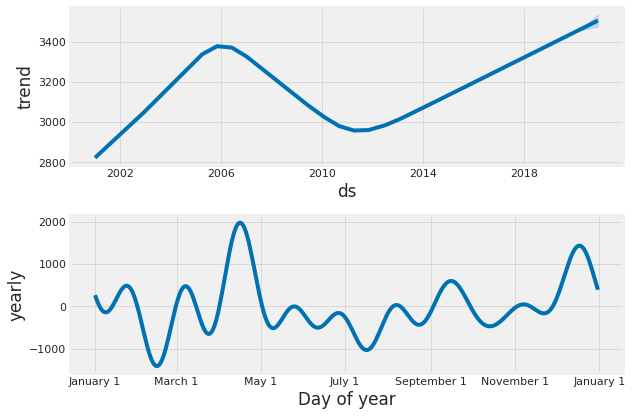

In [119]:
fig1 = prophet.plot_components(forecast)

                            Want to see more of Kernels like this one? Leave an upvote then :)